 # CMSC 6950 Project on Canadian Covid19 data

In [1]:
# read data
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://health-infobase.canada.ca/src/data/covidLive/covid19.csv"
gets_data = requests.get(url, allow_redirects=True)

open("data.csv", 'wb').write(gets_data.content)

175718

In [3]:
df = pd.read_csv("data.csv")
df = df[df.prname != 'Canada']
df.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,ratetested,numtoday,percentoday,ratetotal,ratedeaths,deathstoday,percentdeath,testedtoday,recoveredtoday,percentactive
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,...,NaN,3,300.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,...,NaN,1,100.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,...,NaN,0,0.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,...,NaN,3,300.0,0.08,0.0,0.0,0.0,NaN,NaN,100.0
6,35,Ontario,Ontario,16-02-2020,3,0,0.0,3,NaN,NaN,...,NaN,0,0.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0


In [4]:
# #If the data has not yet been downloaded, download it now
# if not os.path.exists(data_filename):
#     r = requests.get(data_url, allow_redirects=True)
#     open(data_filename, 'wb').write(r.content)

In [5]:
def making_new_dataframe(main_col, col4_num):
    """ Returns the new DataFrame.
        
        Parameters:
            main_col (str): The column of the main dataframe whose values will be column for new dataframe.
            
            col4_num (str): The column of the main dataframe whose values will be stored as data in new dataframe.
            
        Returns:
            graph_df: Returns the new DataFrame  
    
    """
    graph_df = pd.DataFrame()

    for province in df[main_col].unique():
#         print(province)
        province_df = df.copy()[df[main_col]==province]
        province_df.set_index("date", inplace=True)
        province_df[f"{province}"] = province_df[col4_num]

        if graph_df.empty:
            graph_df = province_df[[f"{province}"]]
        else:
            graph_df = graph_df.join(province_df[f"{province}"])
    return graph_df

1. Plot for total cases in each province and territories over time 

In [6]:
for_total_cases = making_new_dataframe("prname","numconf")
for_total_cases.tail()

,Ontario,British Columbia,Quebec,Alberta,Saskatchewan,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Prince Edward Island,Northwest Territories,Nunavut,Yukon,Repatriated travellers
date,,,,,,,,,,,,,,
17-06-2020,32744,2775,54263.0,7530.0,693.0,295.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
18-06-2020,32917,2783,54383.0,7579.0,708.0,297.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
19-06-2020,33095,2790,54550.0,7625.0,716.0,300.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
20-06-2020,33301,2790,54674.0,7673.0,726.0,302.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0
21-06-2020,33476,2790,54766.0,7704.0,746.0,302.0,164.0,261.0,1061.0,27.0,5.0,0.0,11.0,13.0


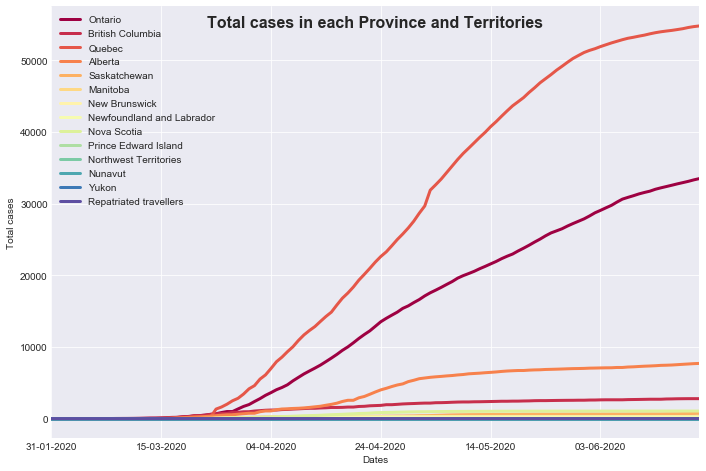

In [7]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
for_total_cases.fillna(0).plot(lw=3,cmap="Spectral",ax=ax)
fig.suptitle("Total cases in each Province and Territories", fontsize=16, fontweight="bold")
ax.set(xlabel="Dates",
      ylabel="Total cases")
ax.legend(loc=0).set_visible(True)

2. Plot for number of individuals tested in each province over time

In [8]:
for_num_test = making_new_dataframe("prname","numtested")
for_num_test.tail()

,Ontario,British Columbia,Quebec,Alberta,Saskatchewan,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Prince Edward Island,Northwest Territories,Nunavut,Yukon,Repatriated travellers
date,,,,,,,,,,,,,,
17-06-2020,1036393.0,146712.0,533133.0,318276.0,51127.0,54204.0,34992.0,15091.0,50893.0,9163.0,2227.0,949.0,1245.0,76.0
18-06-2020,1060845.0,148500.0,538818.0,324964.0,51644.0,54842.0,35355.0,15303.0,51358.0,9286.0,2231.0,968.0,1250.0,76.0
19-06-2020,1087179.0,149929.0,545165.0,332766.0,52278.0,55401.0,35619.0,15539.0,51658.0,9490.0,2239.0,974.0,1250.0,76.0
20-06-2020,1113671.0,151626.0,551352.0,339165.0,52798.0,56147.0,36184.0,15700.0,51943.0,9647.0,2239.0,983.0,1250.0,76.0
21-06-2020,1136313.0,152568.0,551352.0,345952.0,53481.0,56847.0,36375.0,15960.0,52229.0,9810.0,2239.0,989.0,1250.0,76.0


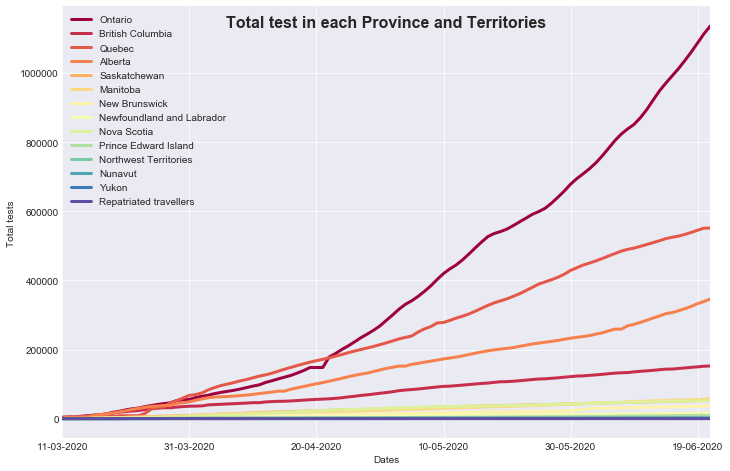

In [9]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
for_num_test.dropna().plot(lw=3,cmap="Spectral",ax=ax)
fig.suptitle("Total test in each Province and Territories", fontsize=16, fontweight="bold")
ax.set(xlabel="Dates",
      ylabel="Total tests")
ax.legend(loc=0).set_visible(True);

3. Plot for number of cases per day

In [10]:
# Keeping a cutoff of 20 so that Provinces whose cases a day is more than 20 will be plotted
my_numtoday_list = df[df["numtoday"]>20]
my_numtoday_list.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,ratetested,numtoday,percentoday,ratetotal,ratedeaths,deathstoday,percentdeath,testedtoday,recoveredtoday,percentactive
121,35,Ontario,Ontario,15-03-2020,103,0,1.0,103,8461.0,NaN,...,581.0,24,30.38,0.71,0.007,0.0,0.97,1815.0,NaN,99.03
136,35,Ontario,Ontario,16-03-2020,145,0,1.0,145,10178.0,NaN,...,699.0,42,40.78,1.00,0.007,0.0,0.69,1717.0,NaN,99.31
147,59,British Columbia,Colombie-Britannique,17-03-2020,103,0,7.0,103,11612.0,NaN,...,2290.0,30,41.10,2.03,0.138,3.0,6.80,1686.0,NaN,93.20
151,35,Ontario,Ontario,17-03-2020,177,0,1.0,177,11167.0,NaN,...,767.0,32,22.07,1.22,0.007,0.0,0.56,989.0,NaN,99.44
162,59,British Columbia,Colombie-Britannique,18-03-2020,186,0,7.0,186,13388.0,NaN,...,2640.0,83,80.58,3.67,0.138,0.0,3.76,1776.0,NaN,96.24


In [11]:
graph_daily_df = pd.DataFrame()

for province in my_numtoday_list["prname"].unique():
#     print(province)
    region_df = my_numtoday_list.copy()[my_numtoday_list["prname"]==province]
    region_df.set_index("date", inplace=True)
    region_df[f"{province}"] = region_df["numtoday"]
    
    if graph_daily_df.empty:
        graph_daily_df = region_df[[f"{province}"]]
    else:
        graph_daily_df = graph_daily_df.join(region_df[f"{province}"])

In [12]:
graph_daily_df.tail()

,Ontario,British Columbia,Alberta,Quebec,Newfoundland and Labrador,Saskatchewan,Manitoba,Nova Scotia
date,,,,,,,,
17-06-2020,190,NaN,48.0,117.0,NaN,NaN,NaN,NaN
18-06-2020,173,NaN,49.0,120.0,NaN,NaN,NaN,NaN
19-06-2020,178,NaN,46.0,167.0,NaN,NaN,NaN,NaN
20-06-2020,206,NaN,48.0,124.0,NaN,NaN,NaN,NaN
21-06-2020,175,NaN,31.0,92.0,NaN,NaN,NaN,NaN


In [13]:
# Filling zeros in place of NaN
graph_daily_df_new = graph_daily_df.fillna(0)
graph_daily_df_new.head()

,Ontario,British Columbia,Alberta,Quebec,Newfoundland and Labrador,Saskatchewan,Manitoba,Nova Scotia
date,,,,,,,,
15-03-2020,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16-03-2020,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17-03-2020,32,30.0,0.0,0.0,0.0,0.0,0.0,0.0
19-03-2020,69,85.0,49.0,47.0,0.0,0.0,0.0,0.0
20-03-2020,53,0.0,49.0,0.0,0.0,0.0,0.0,0.0


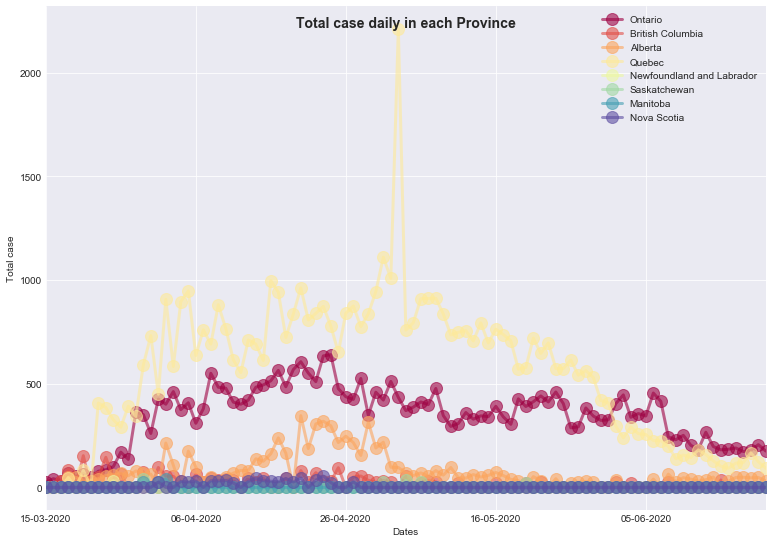

In [14]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
graph_daily_df_new.plot(lw=3,cmap="Spectral",marker='o',ms=12,alpha=0.6,ax=ax)
fig.suptitle("Total case daily in each Province", fontsize=14, fontweight="bold")
ax.set(xlabel="Dates",
      ylabel="Total case")
ax.legend(loc=0).set_visible(True)

# Extra work

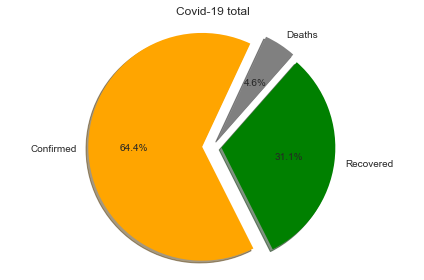

Confirmed: 10667348; Recovered: 5149466.0; Deaths: 755452.0.


In [15]:
df2 = pd.read_csv("data.csv")
df2[df2.prname == 'Canada']
Confirmed =df2.numconf.sum()
Deaths = df2.numdeaths.sum()
Recovered = df2.numrecover.sum()

sizes = [Confirmed, Recovered, Deaths]
labels = ['Confirmed', 'Recovered', 'Deaths']

explode = (0.1, 0.07,0.07)
fig1, ax1 = plt.subplots()
ax1.set_title('Covid-19 total')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=65, colors = ['orange','green','grey'])

ax1.axis('equal')  
plt.tight_layout()
plt.show()
print('Confirmed: {}; Recovered: {}; Deaths: {}.'.format(Confirmed,Recovered,Deaths))


In [16]:
from colorama import Fore, Back, Style
closed = int(df2.numdeaths.sum()+df.numrecover.sum())
active = int(df2.numconf.sum() - closed)
print(Fore.CYAN, 'Closed cases: ', closed)
print('Active cases:', active)
print('Cases which had an outcome: \n Recovered: {} ({}%) \n Deaths: {} ({}%)'.format(
            int(df2.numrecover.sum()), ((df2.numrecover.sum()/closed)*100).round(2),
            int(df2.numdeaths.sum()), ((df2.numdeaths.sum()/closed)*100).round(2)))

 Closed cases:  3335834
Active cases: 7331514
Cases which had an outcome: 
 Recovered: 5149466 (154.37%) 
 Deaths: 755452 (22.65%)
